### Step #1: Understand the Problem Statement

The objective of this case study is to **predict the employee salary based on the number of years of experience**.

In **simple linear regression**, we predict the value of one variable \( Y \) based on another variable \( X \).

- \( X \) is called the **independent variable**.
- \( Y \) is called the **dependent variable**.

**Why simple?** Because it examines the relationship between two variables only.

**Why linear?** When the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


### Step #2: Import Libraries and Datasets

In [4]:
# Importing necessary libraries

# TensorFlow for building and training machine learning models
import tensorflow as tf

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations
import numpy as np

# seaborn for statistical data visualization
import seaborn as sns

# matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Ensure that seaborn and matplotlib are correctly imported
# seaborn is misspelled as 'seabor' in the original code


In [7]:
# Importing the kagglehub library to interact with Kaggle datasets
import kagglehub

# Downloading the latest version of the specified dataset from Kaggle
# The dataset is identified by its unique identifier "rohankayan/years-of-experience-and-salary-dataset"
path = kagglehub.dataset_download("rohankayan/years-of-experience-and-salary-dataset")

# Printing the local path where the dataset files are saved
print("Path to dataset files:", path)


Path to dataset files: C:\Users\men_l\.cache\kagglehub\datasets\rohankayan\years-of-experience-and-salary-dataset\versions\1


In [12]:
# Reading the CSV file 'Salary_Data.csv' into a pandas DataFrame
# This DataFrame will contain the dataset with employee salary and years of experience
salary_df = pd.read_csv('Salary_Data.csv')

# Displaying the first few rows of the DataFrame to verify the data has been loaded correctly
salary_df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Further Steps:

1. **Use `head` and `tail` methods to print the first and last 7 rows of the DataFrame:**

2. **Try to find the maximum salary value in the DataFrame:**

In [13]:
# Display the first 7 rows of the DataFrame
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [14]:
# Display the last 7 rows of the DataFrame
salary_df.tail(7)

,YearsExperience,Salary
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [16]:
# Find the maximum salary value in the DataFrame
max_salary = salary_df['Salary'].max()
print("Maximum Salary:", max_salary)


Maximum Salary: 122391.0


### Step #3: Perform Exploratory Data Analysis and Visualization

<Axes: >

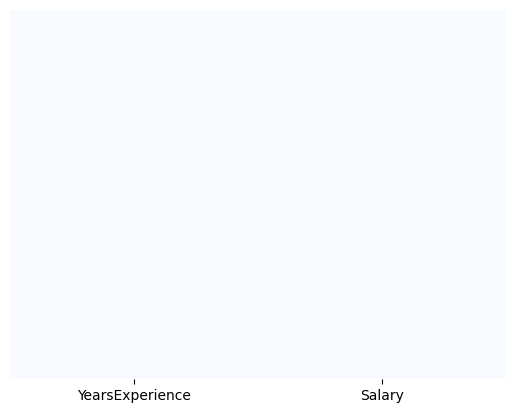

In [19]:
# Check if there are any null values in the DataFrame
# The isnull() method returns a DataFrame of the same shape as salary_df, 
# with True indicating missing values and False indicating non-missing values.
# sns.heatmap() is used to create a heatmap visualization of the null values.
# yticklabels=False removes the y-axis labels for a cleaner look.
# cbar=False removes the color bar to focus on the presence of null values.
# cmap="Blues" sets the color map to shades of blue for better visual distinction.

sns.heatmap(salary_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")


In [21]:
# Check the DataFrame info
# The info() method provides a concise summary of the DataFrame.
# It includes the number of non-null entries, column names, data types, and memory usage.
# This is useful for getting an overview of the dataset and identifying any potential issues, such as missing values or incorrect data types.

salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [23]:
# Generate a statistical summary of the DataFrame
# The describe() method provides descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.
# It includes metrics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
# This summary is useful for understanding the overall distribution and spread of the data.

salary_df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Further Steps:

1. **What are the number of years of experience corresponding to employees with minimum and maximum salaries?**

In [26]:
# Find the number of years of experience for the employee with the minimum salary
min_salary_experience = salary_df.loc[salary_df['Salary'].idxmin(), 'YearsExperience']
print("Years of Experience for Minimum Salary:", min_salary_experience)

# Find the number of years of experience for the employee with the maximum salary
max_salary_experience = salary_df.loc[salary_df['Salary'].idxmax(), 'YearsExperience']
print("Years of Experience for Maximum Salary:", max_salary_experience)


Years of Experience for Minimum Salary: 1.5
Years of Experience for Maximum Salary: 10.3


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

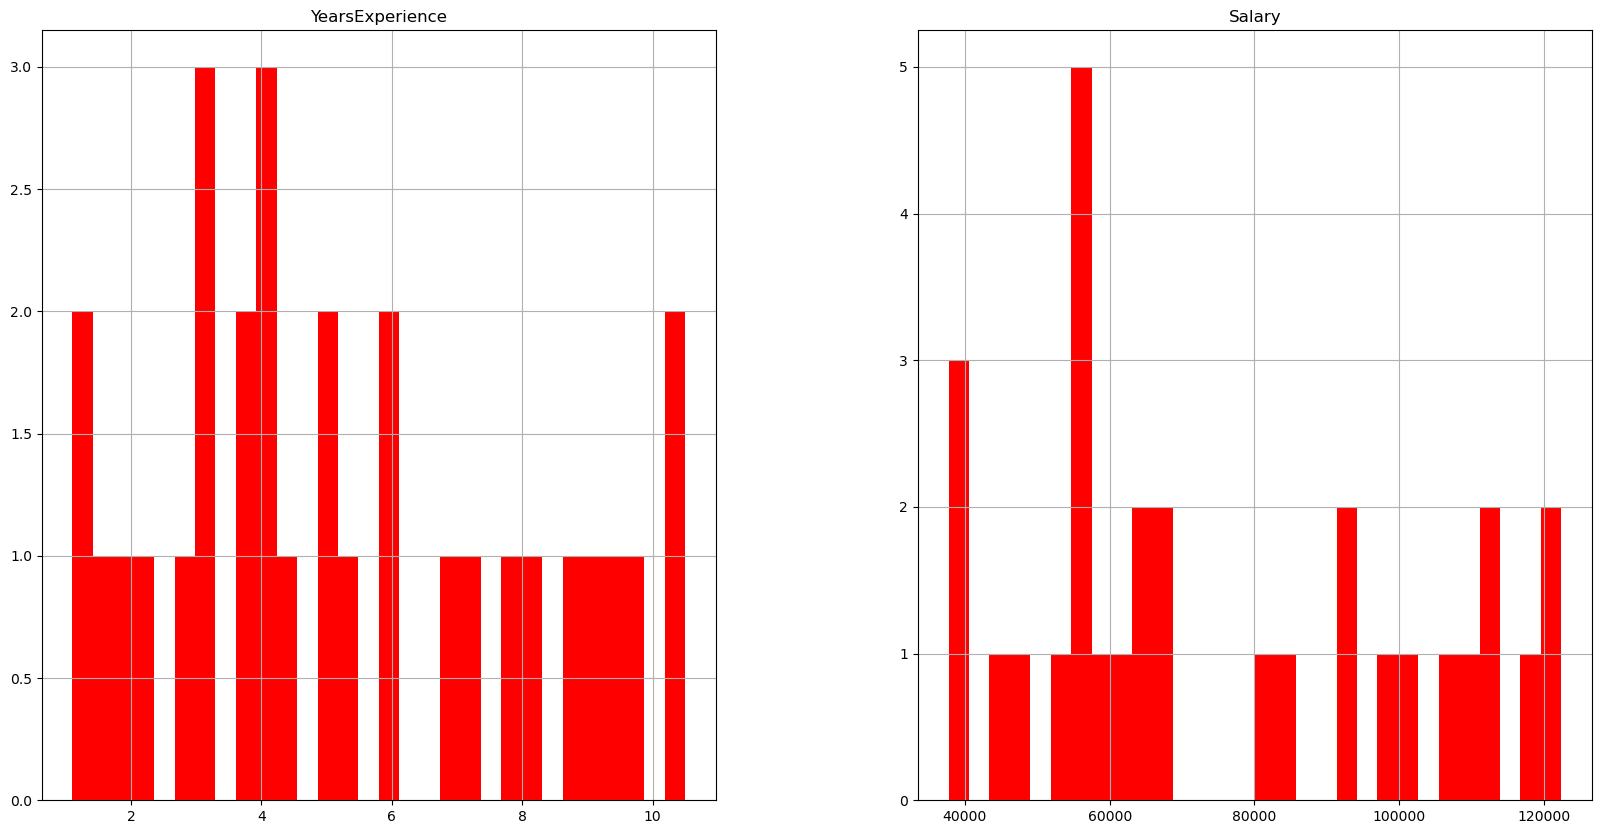

In [29]:
# Create histograms for each numerical column in the DataFrame
# The hist() method generates a histogram for each numerical column in the DataFrame.
# bins=30 specifies the number of bins to use for the histogram, providing a more granular view of the data distribution.
# figsize=(20, 10) sets the size of the figure to 20 inches by 10 inches, making the plot larger and easier to read.
# color='r' sets the color of the histograms to red for better visual distinction.

salary_df.hist(bins=30, figsize=(20, 10), color='r')


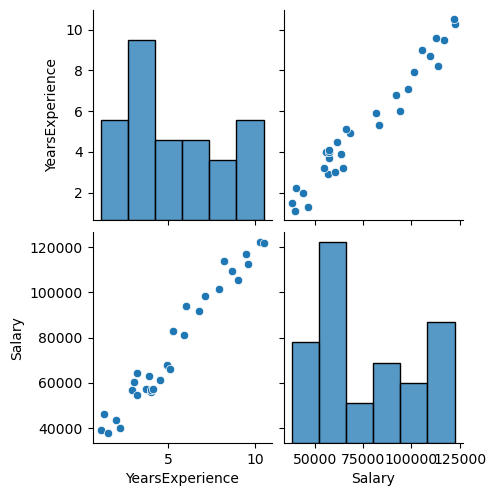

In [31]:
# Plot pairwise relationships in the DataFrame using seaborn's pairplot
# The pairplot() function creates a grid of Axes such that each numeric variable in the DataFrame
# will be shared across the y-axes across a single row and the x-axes across a single column.
# This allows for visualization of the relationships between pairs of variables in the dataset.
# By default, pairplot() will create scatter plots for each pair of variables and histograms for the marginal plots along the diagonal.

sns.pairplot(salary_df)
